In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# CHANGEMENT CLÉ : Importation de DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# --- 1. Chargement et Étiquetage des Données ---
print("Chargement des fichiers...")
df_normal = pd.read_csv('/content/normal.csv')
df_anomal = pd.read_csv('/content/anormal.csv')


# Ajout de l'étiquette (0 = Normal, 1 = Attaque)
df_normal['label'] = 0
df_anomal['label'] = 1

# Fusion des deux jeux de données
df = pd.concat([df_normal, df_anomal], ignore_index=True)

# --- 2. Prétraitement des Données ---
# Suppression des colonnes inutiles
df = df.drop(['No.', 'Info', 'Time'], axis=1)
print(df)

Chargement des fichiers...
                         Source               Destination Protocol  Length  \
0      fe80::e518:bba6:bfc:14bd  fe80::ffd:3429:5144:68f0  UDP/XML    1300   
1      fe80::ffd:3429:5144:68f0  fe80::e518:bba6:bfc:14bd   ICMPv6    1294   
2      fe80::e518:bba6:bfc:14bd  fe80::ffd:3429:5144:68f0  UDP/XML    1300   
3      fe80::ffd:3429:5144:68f0  fe80::e518:bba6:bfc:14bd   ICMPv6    1294   
4               192.168.194.129           192.168.194.130  UDP/XML    1269   
...                         ...                       ...      ...     ...   
10036           192.168.194.130           192.168.194.129    SSHv2     122   
10037           192.168.194.129           192.168.194.130    SSHv2     130   
10038           192.168.194.130           192.168.194.129    SSHv2     146   
10039           192.168.194.129           192.168.194.130    SSHv2     130   
10040           192.168.194.130           192.168.194.129      TCP      60   

       label  
0          0  
1     

Entraînement de l'Arbre de Décision en cours...

--- Rapport de Classification (Decision Tree) ---
              precision    recall  f1-score   support

      Normal       0.90      1.00      0.95       721
     Attaque       1.00      0.94      0.97      1288

    accuracy                           0.96      2009
   macro avg       0.95      0.97      0.96      2009
weighted avg       0.96      0.96      0.96      2009



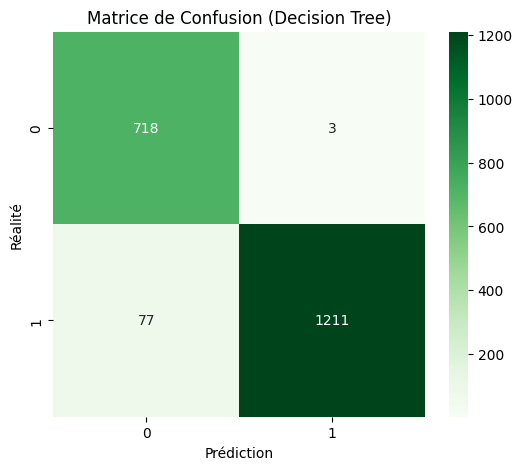


Variables les plus importantes pour la détection :
       Feature  Importance
1  Destination    0.459603
0       Source    0.351394
3       Length    0.182415
2     Protocol    0.006587


In [10]:
# Encodage des variables catégorielles (Protocol, Source, Destination)
le = LabelEncoder()

# Encodage du Protocole
df['Protocol'] = le.fit_transform(df['Protocol'].astype(str))

# Encodage des IPs
all_ips = pd.concat([df['Source'], df['Destination']]).astype(str).unique()
le.fit(all_ips)
df['Source'] = le.transform(df['Source'].astype(str))
df['Destination'] = le.transform(df['Destination'].astype(str))

# --- 3. Séparation Entraînement / Test ---
X = df.drop('label', axis=1)
y = df['label']

# 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Entraînement du Modèle (Decision Tree) ---
print("Entraînement de l'Arbre de Décision en cours...")
# Initialisation et entraînement du Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# --- 5. Évaluation ---
y_pred = clf.predict(X_test)

print("\n--- Rapport de Classification (Decision Tree) ---")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attaque']))

# Génération de la Matrice de Confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Matrice de Confusion (Decision Tree)')
plt.ylabel('Réalité')
plt.xlabel('Prédiction')
plt.show()

# Affichage de l'importance des variables
features = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
print("\nVariables les plus importantes pour la détection :")
print(features.sort_values('Importance', ascending=False))